In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df_path= Path('/Users/khashayarzare/Desktop/Carleton University/Capstone 2024/data/ngs-81M0011-E-2018_F1.dta')

In [3]:

df = pd.read_stata(df_path, convert_categoricals=False)


/var/folders/kl/j44n1f9551gb0b57c2h4xbh40000gn/T/ipykernel_14253/2860887416.py:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata(df_path, convert_categoricals=False)


In [4]:
pd.set_option('display.max_columns', None)
df.head()

,PUMFID,gender,PGM_034,PGM_P036,work_placement,PGM_280A,PGM_280B,PGM_280C,PGM_280D,PGM_280E,entrep,PGM_290,PGM_350,PGM_380,PGM_P400,gpa,PGM_410,PGM_415,PGM_430,PGM_440,EDU_010,EDU_020,student_loan,STL_020,STL_030,STL_080,STL_100A,STL_100B,STL_100C,STL_100D,STL_130,STL_150,STL_160B,STL_160C,STL_160D,STL_160E,STL_160F,STL_160G,STL_160H,STL_160I,STL_160J,STL_160L,STLP160N,STL_170A,STL_170B,STL_170C,STL_170D,STL_170E,STL_170F,STL_170G,STL_170H,STL_170I,STL_170J,STL_170L,STLP170N,STL_190,LFW_010,LFW_P020,LFW_120,LFW_P140,LFW_270,LFW_280,LFW_370,LFW_400,LFW_410,LFW_420A,LFW_420B,LFW_420C,LFW_440,AFT_P010,AFT_020,AFT_P040,AFT_050,AFT_070,AFT_080,AFT_090,BEF_P140,BEF_P150,BEF_160,DEM_P010,DEM_P030,DEM_P140,GRADAGEP,REG_INST,cert_lvl,program,coop,PREVLEVP,HLOSGRDP,HLOSINTP,STULOANS,OWESLGD,OWEGVIN,SRCFUND,RESP,SCHOLAR,DBTOTGRD,DBTOTINT,DBTALGRD,DBTALINT,LFSTAT,LFCINDP,occup,LFWFTPT1,JOBQLEVP,JOBQLGRD,JOBQLINT,JOBINCP,income,REG_RESP,VISBMINP,CTZSHIPP,LHOMEP,LFIRSTP,FATHEDP,FATEDGRD,FATEDINT,MOTHEDP,MOTEDGRD,MOTEDINT,DDIS_FL,DTYPERP,DCLASSP,WTPF,rel_educ,gpa_new,fitted,inst_rep,_est_est1,yhat
0,28113,2,1.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,NaN,1.0,1.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,2.0,1.0,2.0,2.0,6.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,NaN,2.0,3.0,1.0,2.0,2.0,0.0,3.0,1.0,4,1.0,5.0,2.0,NaN,1.0,2.0,2.0,NaN,NaN,3.0,NaN,1.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0,1.0,6.0,5.0,NaN,1.0,2.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,2,NaN,0.0,32.2057,1.0,2.0,4.051403,0.0,1,3.914762
1,28114,2,1.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,1.0,NaN,2.0,NaN,0.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,1.0,NaN,3.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,4,2.0,4.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,1.0,NaN,3.0,3.0,6.0,3.0,3.0,6.0,3.0,3.0,2,NaN,0.0,11.0231,3.0,1.0,NaN,1.0,0,NaN
2,28117,1,2.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,3.0,1.0,NaN,2.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,1.0,1.0,NaN,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,6.0,2.0,0.0,1.0,1.0,4,1.0,8.0,2.0,NaN,1.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,8.0,1.0,1.0,2.0,2.0,7.0,7.0,NaN,2.0,1.0,1.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,2,NaN,0.0,10.6000,2.0,3.0,4.546651,0.0,1,4.634356
3,28118,1,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,1.0,1.0,NaN,2.0,1.0,1.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,2.0,1.0,NaN,3.0,3.0,2.0,6.0,1.0,0.0,1.0,2.0,4,3.0,5.0,1.0,2.0,3.0,3.0,2.0,NaN,NaN,3.0,NaN,1.0,3.0,2.0,3.0,2.0,1.0,3.0,5.0,1.0,2.0,1.0,1.0,8.0,7.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1,1.0,1.0,10.4117,1.0,3.0,6.949412,0.0,1,7.035017
4,28121,2,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,6.0,1.0,1.0,NaN,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,1.0,1.0,1.0,NaN,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,6.0,2.0,0.0,1.0,1.0,4,1.0,8.0,1.0,NaN,1.0,1.0,2.0,NaN,NaN,3.0,NaN,1.0,3.0,0.0,3.0,0.0,1.0,3.0,2.0,1.0,2.0,3.0,3.0,7.0,6.0,NaN,2.0,1.0,1.0,1.0,5.0,3.0,3.0,5.0,3.0,3.0,1,2.0,1.0,11.3271,3.0,2.0,4.265996,0.0,1,4.337170


In [5]:
import numpy as np
df.replace('.d', np.nan, inplace=True)

In [6]:
'''# Attempt to convert columns to integers where possible
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    except ValueError:
        pass'''

"# Attempt to convert columns to integers where possible\nfor col in df.columns:\n    try:\n        df[col] = pd.to_numeric(df[col], downcast='integer')\n    except ValueError:\n        pass"

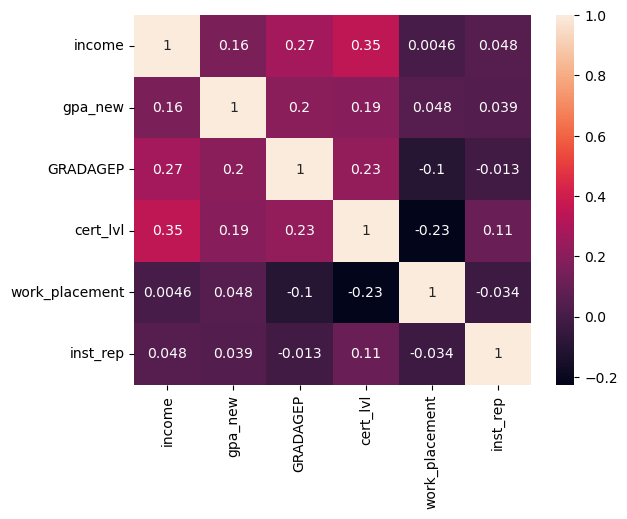

In [7]:
corrMatrix= df[['income', 'gpa_new','GRADAGEP','cert_lvl', 'work_placement', 'inst_rep']].corr()
sns.heatmap(corrMatrix, annot=True) 
plt.show()

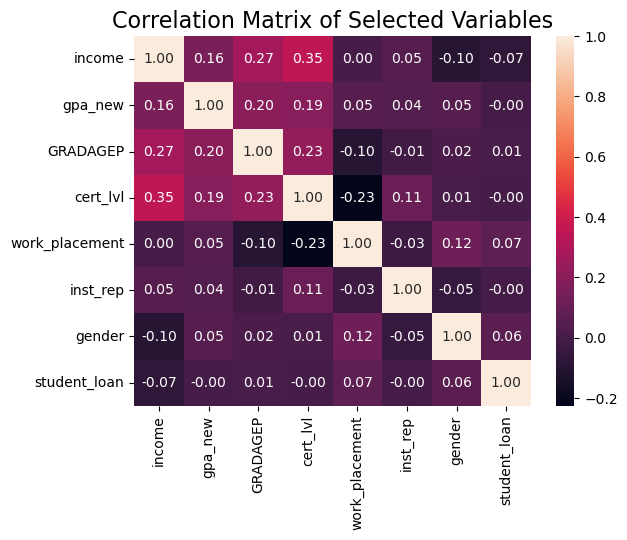

In [8]:
corrMatrix= df[['income', 'gpa_new','GRADAGEP','cert_lvl', 'work_placement', 'inst_rep', 'gender', 'student_loan']].corr()
sns.heatmap(corrMatrix, annot=True, fmt= ".2f") 
plt.title("Correlation Matrix of Selected Variables", fontsize= 16)
plt.show()

In [9]:
#run if you want a list of all the variables 
#df.columns.tolist()

In [10]:
df['gpa_new'].head(10)

0    2.0
1    1.0
2    3.0
3    3.0
4    2.0
5    2.0
6    1.0
7    3.0
8    3.0
9    2.0
Name: gpa_new, dtype: float32

In [11]:
nan_count= [df['income'].isnull().sum(), df['income'].notnull().sum()]
nan_count

[2278, 15207]

In [12]:
nan_count= [df['gpa_new'].isnull().sum(), df['income'].notnull().sum()]
nan_count

[852, 15207]

In [13]:
df['income'].unique()

array([ 5.,  1.,  7.,  6.,  3.,  4., nan,  2., 10.,  8.,  9.])

In [14]:
#Data Cleaning; Dropping all the rows with empty(Nan) values 
df_cleaned = df.dropna(subset=['income', 'gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender', 'program' ])

# Extract cleaned columns
income_cleaned = df_cleaned['income']
gpa_new_cleaned = df_cleaned['gpa_new']
grad_age_cleaned= df_cleaned['GRADAGEP']

X = df_cleaned[['gpa_new', 'GRADAGEP']]  # Include all independent variables

X = sm.add_constant(X)  # Add constant term

# Fit OLS regression model
model = sm.OLS(income_cleaned, X).fit(cov='H2')

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     687.1
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          9.24e-286
Time:                        12:22:10   Log-Likelihood:                -33811.
No. Observations:               14448   AIC:                         6.763e+04
Df Residuals:                   14445   BIC:                         6.765e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9790      0.090     33.057      0.0

In [15]:
X = df_cleaned[['gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender']]   # Select independent variables
y= df_cleaned['income']  # Dependent variable

# Add constant to the independent variables
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X).fit(cov='H2')

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     290.2
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:22:10   Log-Likelihood:                -33645.
No. Observations:               14448   AIC:                         6.730e+04
Df Residuals:                   14441   BIC:                         6.736e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.6463      0.122     29.

In [16]:
X= pd.get_dummies
X = pd.get_dummies(df_cleaned[['gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender', 'program']], drop_first=True)

# Add constant to the independent variables
X = sm.add_constant(X)

# Dependent variable
y = df_cleaned['income']

# Fit OLS regression model
model = sm.OLS(y, X).fit(cov='H2')

# Print regression summary- remove the note sign # to show the output 
#print(model.summary())

In [17]:
import os 
os.chdir("/Applications/Stata/utilities")
from pystata import config
config.init("se")


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 12 Feb 2025
Serial number: 401809302814
  Licensed to: Khashayar Zare
               Carleton university

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.


In [18]:
%%stata
use "/Users/khashayarzare/Desktop/Carleton University/Capstone 2024/data/ngs-81M0011-E-2018_F1.dta"

reg income gpa_new


. use "/Users/khashayarzare/Desktop/Carleton University/Capstone 2024/data/ngs-
> 81M0011-E-2018_F1.dta"

. 
. reg income gpa_new

      Source |       SS           df       MS      Number of obs   =    14,503
-------------+----------------------------------   F(1, 14501)     =    387.58
       Model |  2611.38413         1  2611.38413   Prob > F        =    0.0000
    Residual |  97701.7308    14,501  6.73758574   R-squared       =    0.0260
-------------+----------------------------------   Adj R-squared   =    0.0260
       Total |  100313.115    14,502  6.91719176   Root MSE        =    2.5957

------------------------------------------------------------------------------
      income | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     gpa_new |   .7027891   .0356978    19.69   0.000     .6328168    .7727614
       _cons |   3.665142   .0901162    40.67   0.000     3.488502    3.84178

In [19]:
# Drop NaN values from specified columns
df_cleaned = df.dropna(subset=['income', 'gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender', 'program', 'occup'])

# Convert categorical variables into dummy variables
df_dummies = pd.get_dummies(df_cleaned[['occup']], drop_first=True)

# Combine dummy variables with other independent variables
X = pd.concat([df_cleaned[['gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender','program']], df_dummies], axis=1)

# Add constant to the independent variables
X = sm.add_constant(X)

# Dependent variable
y = df_cleaned['income']

# Fit OLS regression model
model = sm.OLS(y, X).fit(cov_type='HC2')  # Use robust standard errors (HC2)

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     337.3
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:22:11   Log-Likelihood:                -28714.
No. Observations:               12688   AIC:                         5.745e+04
Df Residuals:                   12679   BIC:                         5.751e+04
Df Model:                           8                                         
Covariance Type:                  HC2                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4524      0.141     31.

In [20]:
# Extract coefficients for each category of the occupation variable
occupation_coefs = model.params.loc[df_dummies.columns]

# Print coefficients for each category of the occupation variable
print("Coefficients for each category of the occupation variable:")
print(occupation_coefs)

Coefficients for each category of the occupation variable:
occup   -0.229247
dtype: float64


In [21]:
model = sm.OLS(y, X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     326.2
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:22:11   Log-Likelihood:                -28714.
No. Observations:               12688   AIC:                         5.745e+04
Df Residuals:                   12679   BIC:                         5.751e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4524      0.142     31.

/var/folders/kl/j44n1f9551gb0b57c2h4xbh40000gn/T/ipykernel_14253/1421397576.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot parameters to fit the figure area


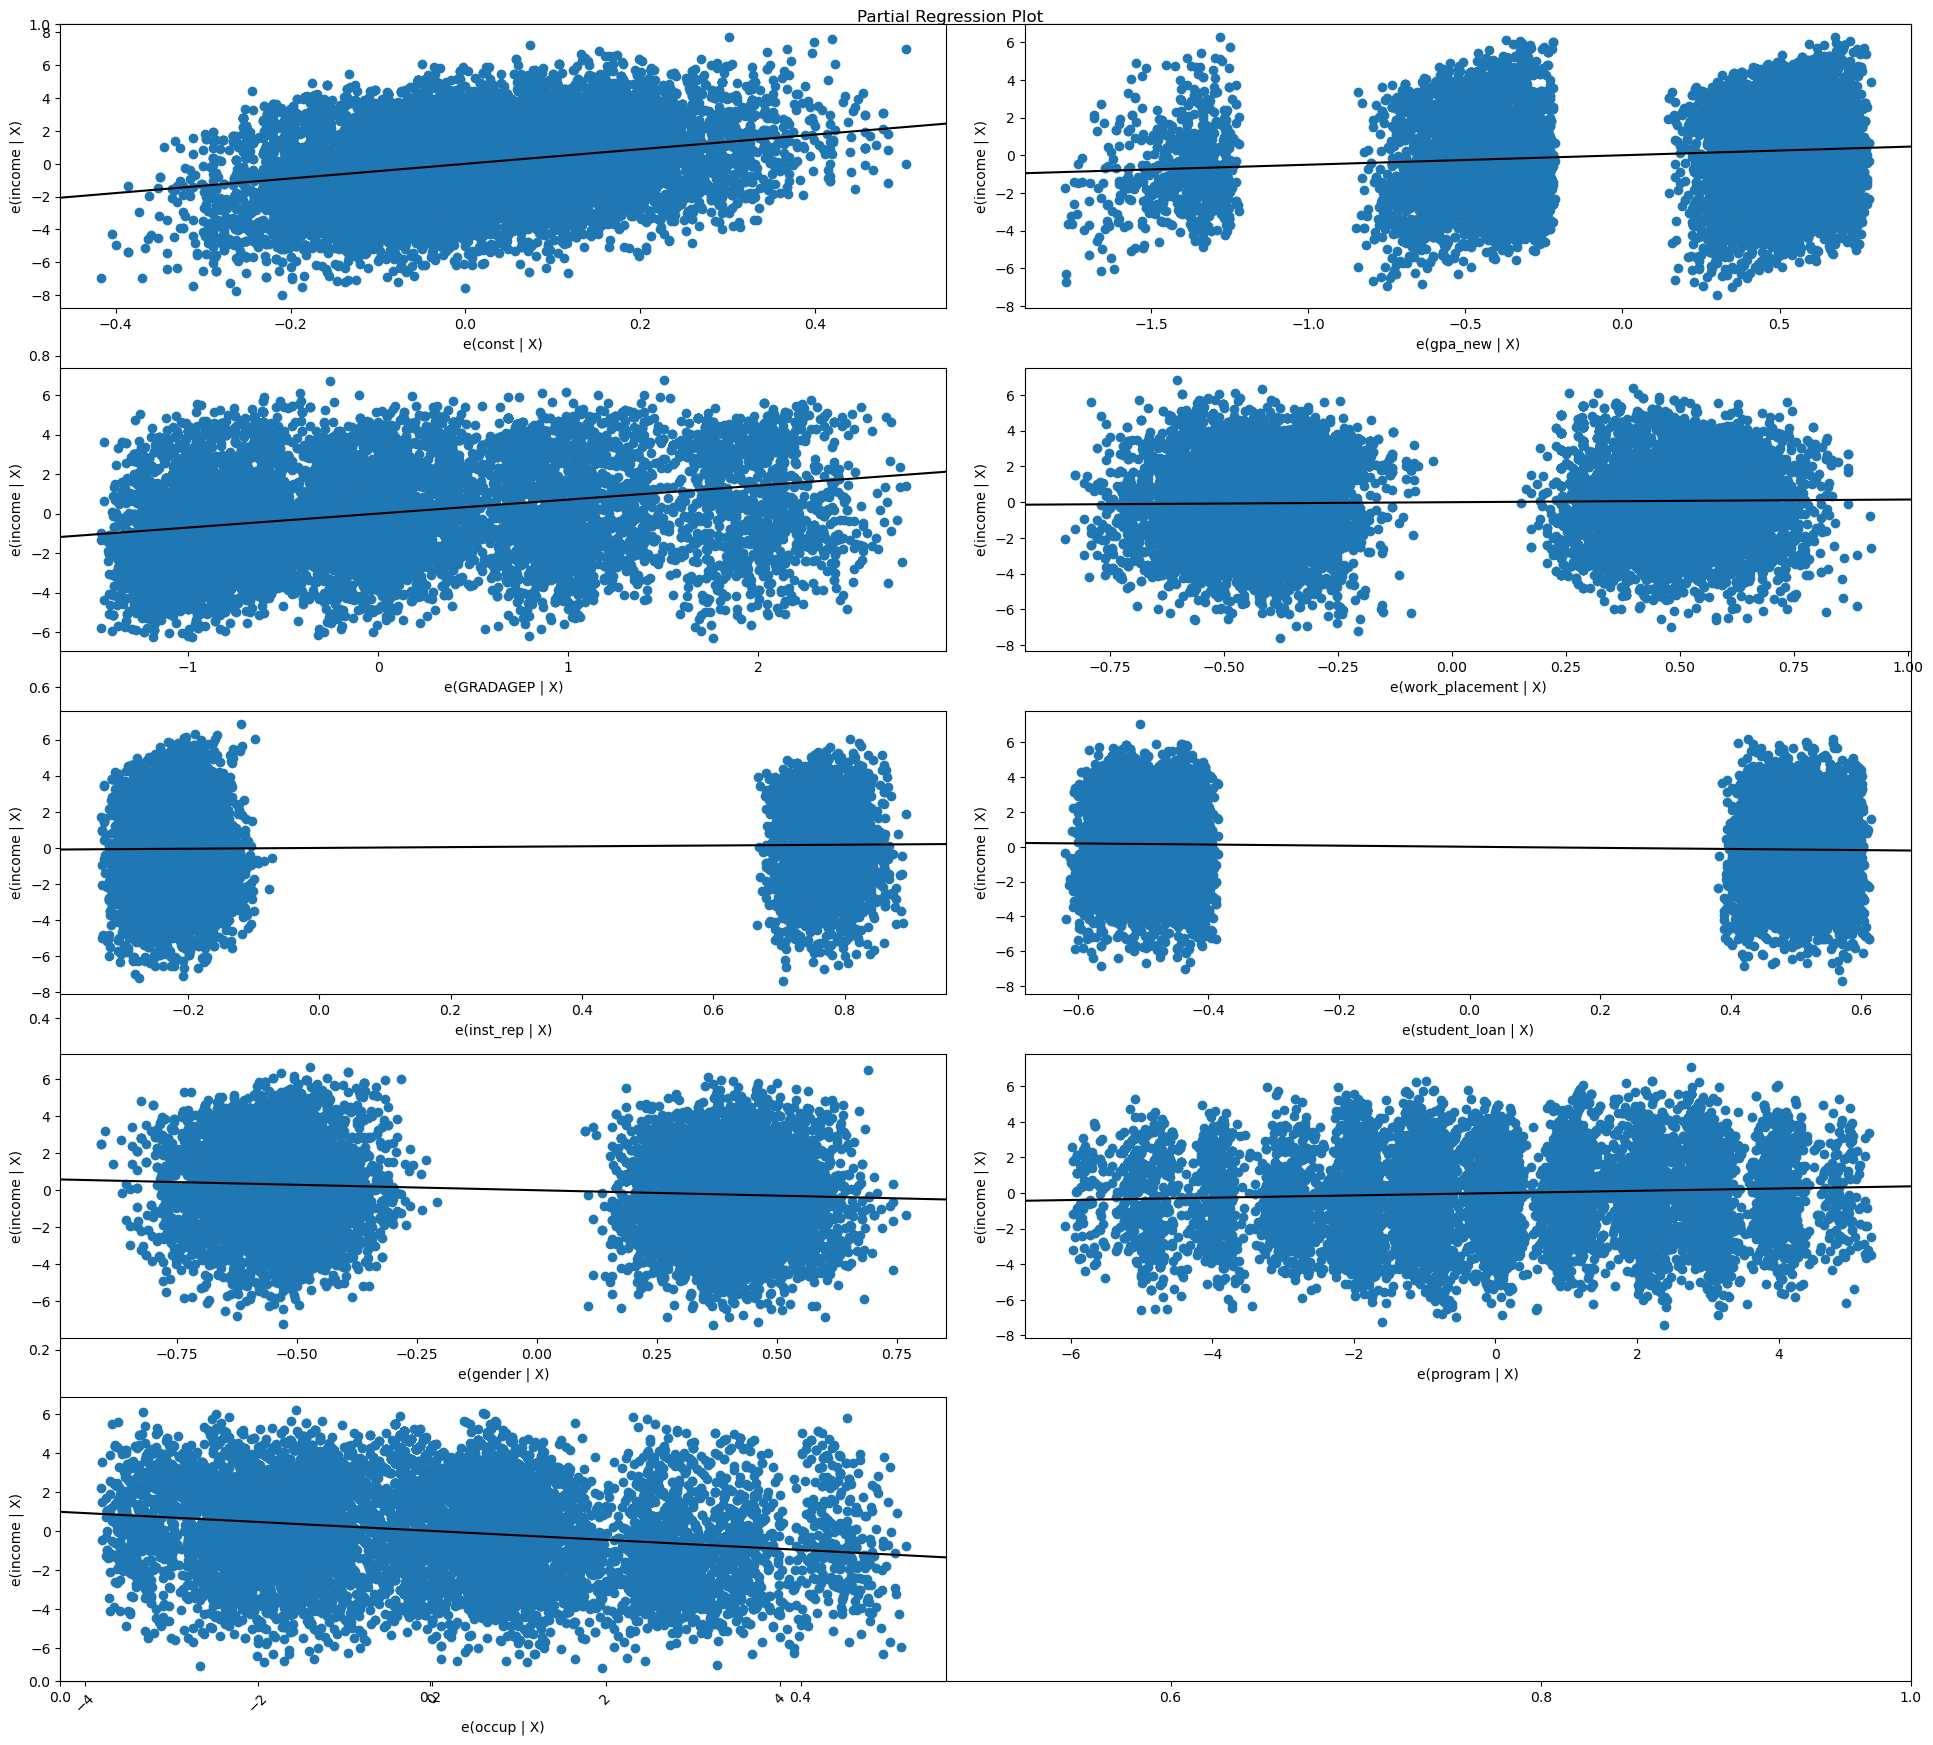

In [22]:
#Partial Regression Plots
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)  # Create a single subplot
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing between subplots
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust subplot parameters to fit the figure area
plt.show()

In [23]:
df_cleaned['occup'].unique()

array([2., 8., 5., 7., 3., 4., 1., 6., 9.])

In [24]:
#One-Hot encoding the Categorical variables( Occupation(occup) and program)
ohe= OneHotEncoder(handle_unknown= 'ignore', sparse_output= False).set_output(transform='pandas')


In [25]:
ohetransform= ohe.fit_transform(df_cleaned[['occup']])
#ohetransform
# to change the column names do it 1 by 1 or do the same process with the convert_categories df and concat

In [26]:
ohetransform1=ohe.fit_transform(df_cleaned[['program']])
ohetransform1

,program_1.0,program_2.0,program_3.0,program_4.0,program_5.0,program_6.0,program_7.0,program_8.0,program_9.0,program_10.0
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
17477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17483,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_categoricals = pd.read_stata(df_path)
df_categoricals= df_categoricals.dropna(subset=['income', 'gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender', 'program' ])
ohetransform2= ohe.fit_transform(df_categoricals[['occup']])
ohetransform3= ohe.fit_transform(df_categoricals[['program']])
#ohetransform2

/var/folders/kl/j44n1f9551gb0b57c2h4xbh40000gn/T/ipykernel_14253/1180175960.py:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_categoricals = pd.read_stata(df_path)


In [28]:
df_cleaned = pd.concat([df_cleaned, ohetransform2, ohetransform3], axis=1)
#i guess not needed anymore  .drop(columns= ['occup', 'program'])

In [29]:
pd.set_option('display.max_columns', None)
print(df_cleaned.columns)

Index(['PUMFID', 'gender', 'PGM_034', 'PGM_P036', 'work_placement', 'PGM_280A',
       'PGM_280B', 'PGM_280C', 'PGM_280D', 'PGM_280E',
       ...
       'program_Agriculture, natural resources and conservation',
       'program_Architecture, engineering, and related technologies',
       'program_Business, management and public administration',
       'program_Education', 'program_Humanities',
       'program_Mathematics, computer and information sciences',
       'program_Other', 'program_Physical and life sciences and technologies',
       'program_Social and behavioural sciences and law',
       'program_Visual and performing arts, and communications technologies'],
      dtype='object', length=150)


In [30]:
df_cleaned = df_cleaned.dropna(subset=['gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender'] + list(df_cleaned.columns[df_cleaned.columns.str.startswith('occup_')]) + list(df_cleaned.columns[df_cleaned.columns.str.startswith('program_')]))


X = pd.concat([df_cleaned[['gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender','program_Agriculture, natural resources and conservation',
       'program_Architecture, engineering, and related technologies',
       'program_Business, management and public administration',
       'program_Education', 'program_Humanities',
       'program_Mathematics, computer and information sciences',
       'program_Other', 'program_Physical and life sciences and technologies',
       'program_Social and behavioural sciences and law',
       'program_Visual and performing arts, and communications technologies']], df_dummies], axis=1)

# Add constant to the independent variables
X = sm.add_constant(X)

# Dependent variable
y = df_cleaned['income']

# Fit OLS regression model
model = sm.OLS(y, X).fit(cov_type='HC2')  # Use robust standard errors (HC2)

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     4664.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:22:12   Log-Likelihood:                -28444.
No. Observations:               12688   AIC:                         5.692e+04
Df Residuals:                   12671   BIC:                         5.705e+04
Df Model:                          16                                         
Covariance Type:                  HC2                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [31]:
X = df_cleaned[['gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender'] + list(df_cleaned.columns[df_cleaned.columns.str.startswith('occup_')]) + list(df_cleaned.columns[df_cleaned.columns.str.startswith('program_')])]

# Add constant to the independent variables (excluding the constant term)
X = sm.add_constant(X)

# Dependent variable
y = df_cleaned['income']

# Fit OLS regression model
model = sm.OLS(y, X).fit(cov_type='HC2')  # Use robust standard errors (HC2)
#
# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     3452.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:22:13   Log-Likelihood:                -28190.
No. Observations:               12688   AIC:                         5.643e+04
Df Residuals:                   12664   BIC:                         5.661e+04
Df Model:                          23                                         
Covariance Type:                  HC2                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

/Users/khashayarzare/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 26, but rank is 24
  warnings.warn('covariance of constraints does not have full '


In [32]:

# Create a DataFrame containing only the independent variables
X = df_cleaned[['gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender',
                'occup_Business, finance and administration occupations', 
                'occup_Health occupations', 'occup_Management occupations', 
                'occup_Natural and applied sciences and related occupations', 
                'occup_Natural resources, agriculture, related production, manufact', 
                'occup_Occupations in art, culture, recreation and sport', 
                'occup_Occupations,education,law,social,community and gov services', 
                'occup_Sales and service occupations', 
                'occup_Trades,transport,equipment operators and related occupations', 
                'occup_nan', 
                'program_Agriculture, natural resources and conservation', 
                'program_Architecture, engineering, and related technologies', 
                'program_Business, management and public administration', 
                'program_Education', 'program_Humanities', 
                'program_Mathematics, computer and information sciences', 
                'program_Other', 
                'program_Physical and life sciences and technologies', 
                'program_Social and behavioural sciences and law', 
                'program_Visual and performing arts, and communications technologies']]

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

#based on "Variance Inflation Factors in Regression Models with Dummy Variables" by R. W. Farebrother" the Multicollinearity arrived from using one hot encoding does not impact the regression model and it can be ignored 


/Users/khashayarzare/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                              Feature       VIF
0                                             gpa_new  1.073701
1                                            GRADAGEP  1.135800
2                                      work_placement  1.188597
3                                            inst_rep  1.015918
4                                        student_loan  1.022931
5                                              gender  1.265748
6   occup_Business, finance and administration occ...       inf
7                            occup_Health occupations       inf
8                        occup_Management occupations       inf
9   occup_Natural and applied sciences and related...       inf
10  occup_Natural resources, agriculture, related ...       inf
11  occup_Occupations in art, culture, recreation ...       inf
12  occup_Occupations,education,law,social,communi...       inf
13                occup_Sales and service occupations       inf
14  occup_Trades,transport,equipment ope

/Users/khashayarzare/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [33]:
#test for robustness: OLS has assumptions such as normality of residuals, homoscedasticity, and independence of errors. If these assumptions are violated, the results may be biased. kNN is non-parametric and doesn't make such assumptions, making it more robust to violations of assumptions.

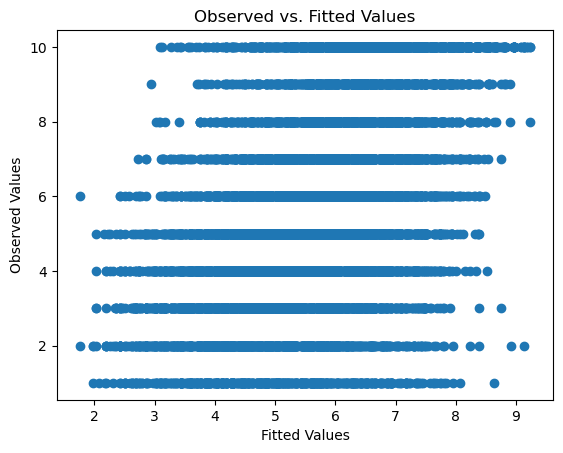

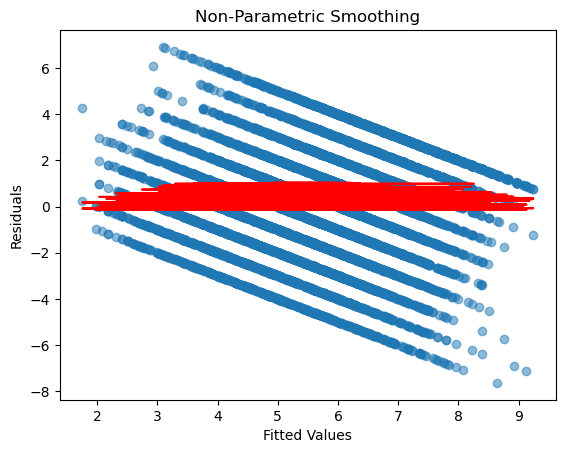

In [34]:
model = sm.OLS(y, X).fit()

# Residuals
residuals = model.resid

# Fitted values
fitted_values = model.fittedvalues

# Scatterplot of observed vs. fitted values
plt.scatter(fitted_values, y)
plt.xlabel("Fitted Values")
plt.ylabel("Observed Values")
plt.title("Observed vs. Fitted Values")
plt.show()

# Non-Parametric Smoothing
lowess = sm.nonparametric.lowess(residuals, fitted_values)
plt.plot(fitted_values, lowess[:, 1], color='red')
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Non-Parametric Smoothing")
plt.show()




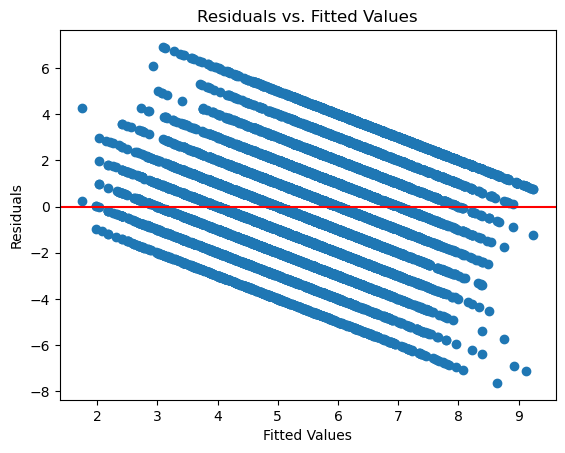

In [35]:
# Residuals vs. Fitted Values Plot
plt.scatter(fitted_values, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

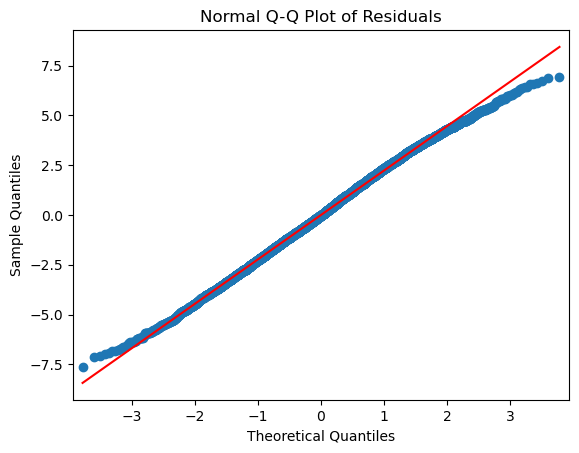

In [36]:
# Normal Q-Q Plot of Residuals
sm.qqplot(residuals, line='s')
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

In [37]:
''' (' income', 'gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender', 'program_Agriculture, natural resources and conservation',
       'program_Architecture, engineering, and related technologies',
       'program_Business, management and public administration',
       'program_Education', 'program_Humanities',
       'program_Mathematics, computer and information sciences',
       'program_Other', 'program_Physical and life sciences and technologies',
       'program_Social and behavioural sciences and law',
       'program_Visual and performing arts, and communications technologies') '''

" (' income', 'gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender', 'program_Agriculture, natural resources and conservation',\n       'program_Architecture, engineering, and related technologies',\n       'program_Business, management and public administration',\n       'program_Education', 'program_Humanities',\n       'program_Mathematics, computer and information sciences',\n       'program_Other', 'program_Physical and life sciences and technologies',\n       'program_Social and behavioural sciences and law',\n       'program_Visual and performing arts, and communications technologies') "

In [38]:
# After the one-hot-encoding, the Adjusted R^2 of the model decreased slightly this could be due to over-fitting and adding 
#too many variables, to address that I will be using Regularization( Normalization) on the model to address over fitting and make the model more robust 

In [39]:
columns_to_check = ['income','gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender']

unique_values_dict = {}

for column in columns_to_check:
    unique_values_dict[column] = df_cleaned[column].unique()

print(unique_values_dict)

{'income': array([ 5.,  7.,  6.,  3.,  4.,  2.,  1., 10.,  8.,  9.]), 'gpa_new': array([2., 3., 1.], dtype=float32), 'GRADAGEP': array([1., 2., 3., 4.]), 'work_placement': array([1., 2.]), 'inst_rep': array([0., 1.], dtype=float32), 'student_loan': array([0., 1.]), 'gender': array([2., 1.])}


In [40]:
count_student_loan = (df['student_loan'] == 0).sum()
count_student_loan
# 0 is Yes applied for loans, 1 is they didnt 


8763

In [41]:
%%stata
use "/Users/khashayarzare/Desktop/Carleton University/Capstone 2024/data/ngs-81M0011-E-2018_F1.dta"
tab student_loan STL_100A


. use "/Users/khashayarzare/Desktop/Carleton University/Capstone 2024/data/ngs-
> 81M0011-E-2018_F1.dta"

. tab student_loan STL_100A

Applied to |
         a |
government |  Received government
  -student | assistance: Repayment
      loan |    assistance plan
   program |       Yes         No |     Total
-----------+----------------------+----------
       Yes |     1,553      4,856 |     6,409 
-----------+----------------------+----------
     Total |     1,553      4,856 |     6,409 

. 


/var/folders/kl/j44n1f9551gb0b57c2h4xbh40000gn/T/ipykernel_14253/1421397576.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot parameters to fit the figure area


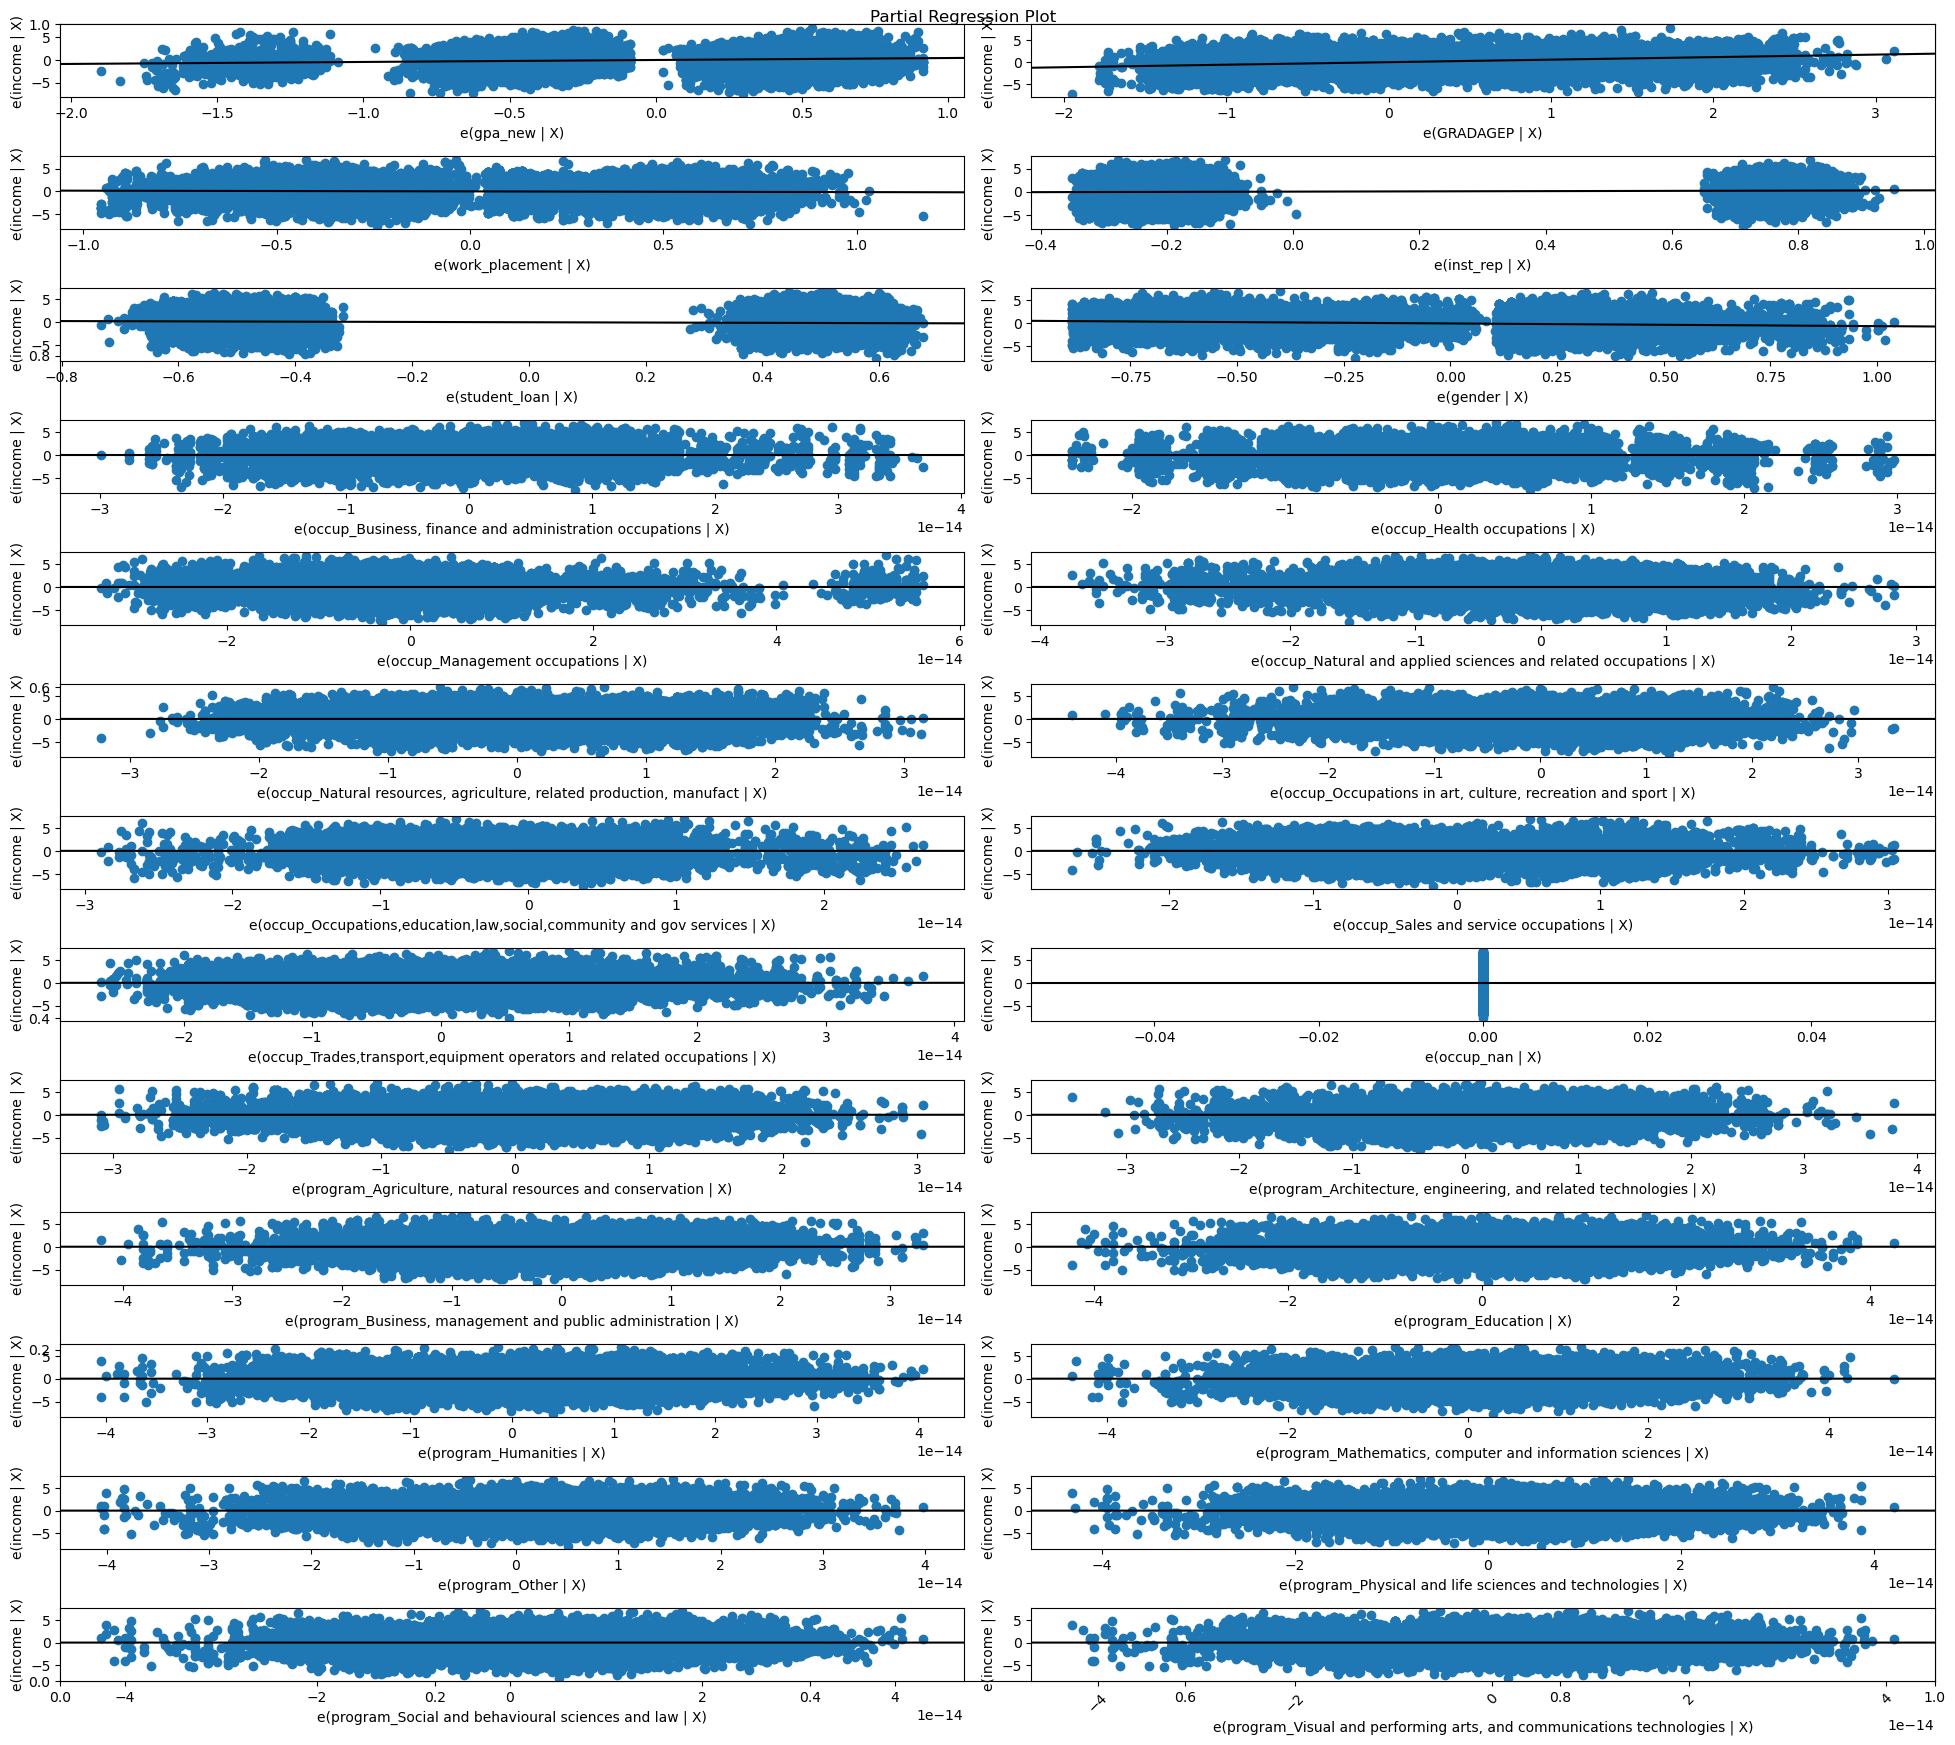

In [42]:
#Partial Regression Plots
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)  # Create a single subplot
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing between subplots
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust subplot parameters to fit the figure area
plt.show()

In [43]:
# extract the data to csv 
os.chdir('/Users/khashayarzare/Desktop/Carleton University/Capstone 2024/data')
df_cleaned.to_csv('df_cleaned.csv', index= False)

In [44]:
print(df.describe())

             PUMFID        gender       PGM_034     PGM_P036  work_placement  \
count  17485.000000  17485.000000  17473.000000  3733.000000    17463.000000   
mean   45996.564026      1.596168      1.302982     2.032146        1.477867   
std    10336.800043      0.490679      0.624222     1.445893        0.499524   
min    28113.000000      1.000000      1.000000     1.000000        1.000000   
25%    37030.000000      1.000000      1.000000     1.000000        1.000000   
50%    45967.000000      2.000000      1.000000     1.000000        1.000000   
75%    54952.000000      2.000000      1.000000     3.000000        2.000000   
max    63868.000000      2.000000      3.000000     5.000000        2.000000   

           PGM_280A      PGM_280B      PGM_280C      PGM_280D      PGM_280E  \
count  17382.000000  17382.000000  17382.000000  17382.000000  17382.000000   
mean       1.962950      1.916926      1.926015      1.968703      1.960131   
std        0.188889      0.276003      0.2

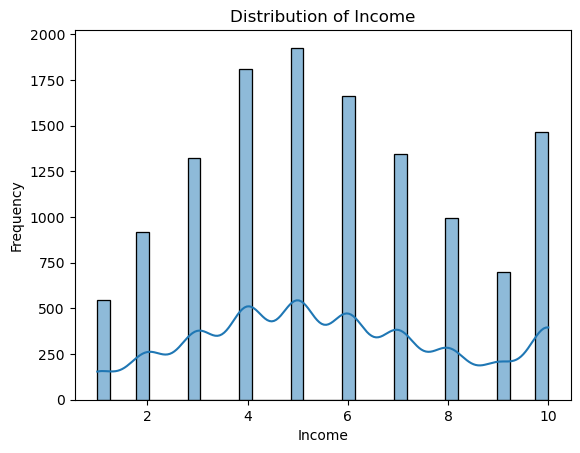

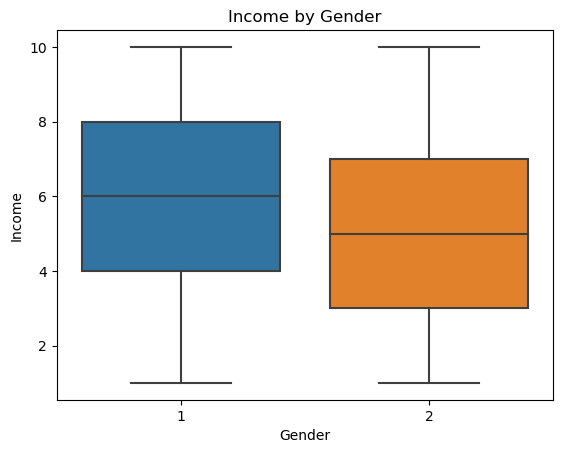

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of income
sns.histplot(df_cleaned['income'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Boxplot of income by gender
sns.boxplot(x='gender', y='income', data=df)
plt.title('Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

In [46]:
# Correlation matrix
correlation_matrix = df[['income', 'gpa', 'gender', 'work_placement', 'program', 'occup', 'student_loan']].corr()
print(correlation_matrix)

                  income       gpa    gender  work_placement   program  \
income          1.000000 -0.116475 -0.097800        0.004592  0.072248   
gpa            -0.116475  1.000000 -0.029459       -0.015668  0.040728   
gender         -0.097800 -0.029459  1.000000        0.120433 -0.122577   
work_placement  0.004592 -0.015668  0.120433        1.000000  0.151213   
program         0.072248  0.040728 -0.122577        0.151213  1.000000   
occup          -0.213960  0.049826 -0.064986        0.044319 -0.011309   
student_loan   -0.070097  0.005159  0.064476        0.074567 -0.009923   

                   occup  student_loan  
income         -0.213960     -0.070097  
gpa             0.049826      0.005159  
gender         -0.064986      0.064476  
work_placement  0.044319      0.074567  
program        -0.011309     -0.009923  
occup           1.000000      0.023340  
student_loan    0.023340      1.000000  


In [47]:
import statsmodels.api as sm

# Multiple linear regression
X = df_cleaned[['gpa', 'gender', 'work_placement', 'program', 'occup', 'student_loan']]
X = sm.add_constant(X)
y = df_cleaned['income']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     217.7
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          1.74e-265
Time:                        12:22:19   Log-Likelihood:                -29279.
No. Observations:               12688   AIC:                         5.857e+04
Df Residuals:                   12681   BIC:                         5.862e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.6398      0.128     67.

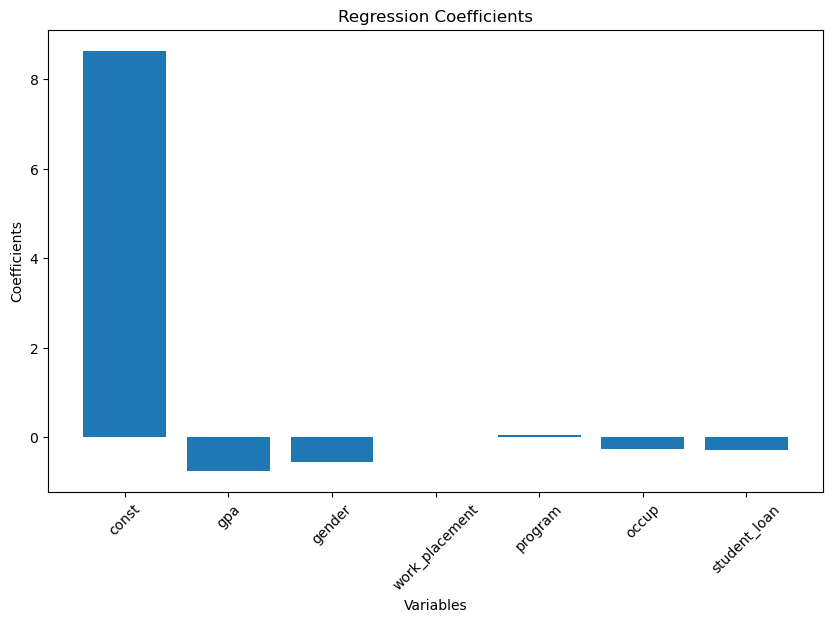

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(model.params.index, model.params.values)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Regression Coefficients')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Compare results with and without GPA
model_no_gpa = sm.OLS(y, sm.add_constant(df_cleaned[['gender', 'work_placement', 'program', 'occup', 'student_loan']])).fit()
print(model_no_gpa.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     168.4
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          5.89e-174
Time:                        12:22:19   Log-Likelihood:                -29493.
No. Observations:               12688   AIC:                         5.900e+04
Df Residuals:                   12682   BIC:                         5.904e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.4363      0.116     64.

In [50]:
model_robust = model.get_robustcov_results(cov_type='HC3')
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     234.9
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          1.34e-285
Time:                        12:22:19   Log-Likelihood:                -29279.
No. Observations:               12688   AIC:                         5.857e+04
Df Residuals:                   12681   BIC:                         5.862e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.6398      0.132     65.

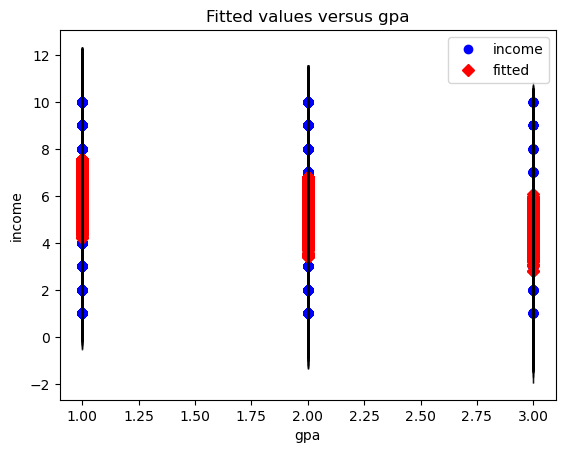

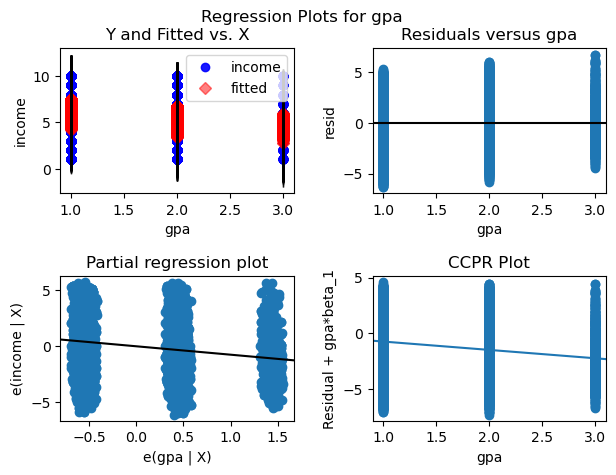

In [51]:
import statsmodels.graphics.regressionplots as sm_graph

# Plot regression diagnostics
sm_graph.plot_fit(model, 1)
plt.show()

sm_graph.plot_regress_exog(model, 'gpa')
plt.show()

#sm_graph.plot_leverage_resid2(model)
#plt.show()

